In [1]:
import os
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import gc #記憶體釋放
from time import sleep
from tqdm import tqdm, trange

ModuleNotFoundError: No module named 'mlxtend'

In [2]:
#疾病名：
#'H10.9' 結膜炎
#L50.9 蕁麻疹
#R19.7 腹瀉

7258
A02.0
len 23
column 32
A02.1
len 5
column 12
A04.7
len 8
column 17
A04.8
len 2
column 8


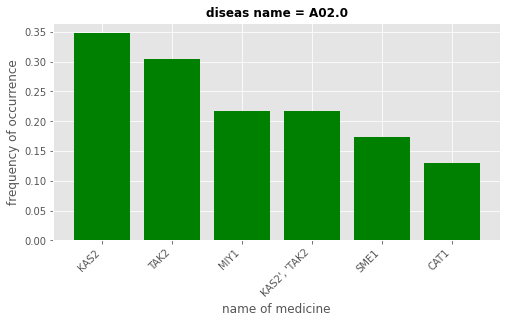

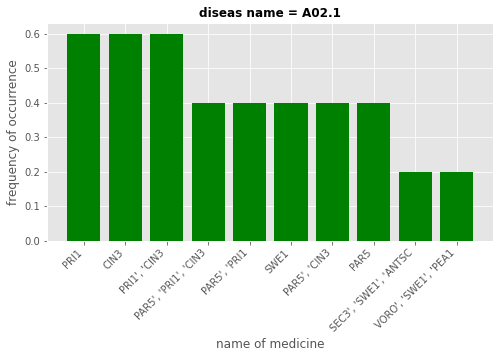

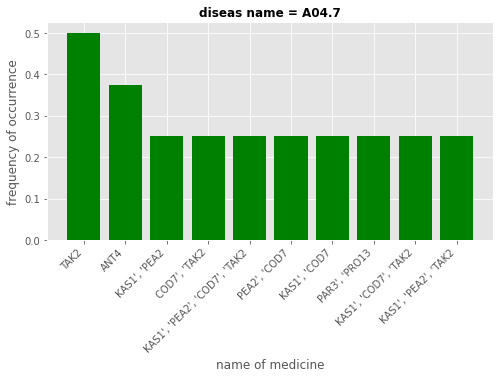

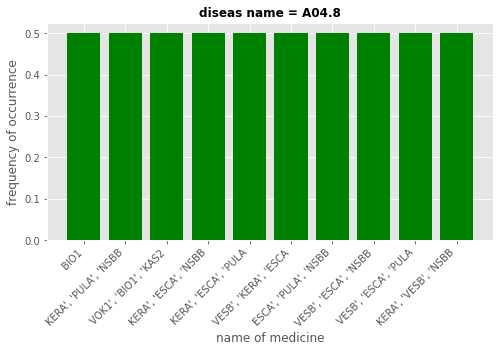

In [3]:
base_path = r'C:\Users\User\聖馬爾定交接\疾病分類V2'
# 創存圖的路徑
fig_path = r'C:\Users\User\聖馬爾定交接\fig'
if not os.path.isdir(os.path.abspath(fig_path)):
    os.makedirs(os.path.abspath(fig_path))
# 創頻繁項目集的路徑
freq_path = r'C:\Users\User\聖馬爾定交接\freq'
if not os.path.isdir(os.path.abspath(freq_path)):
    os.makedirs(os.path.abspath(freq_path))
# 所有疾病名
file_list = os.listdir(base_path)
print(len(file_list))

MIN_support = 0.1 # 篩選support值要多少以上
for i in range(4):
# for i in range(1000,len(file_list)):
    file_name = file_list[i][:-4] #疾病代號
    print(file_name)
    show = 10 #畫圖要畫出support前幾名的藥品
    df1 = pd.read_csv(base_path+'\{}.csv'.format(file_name), index_col=[0])
    aaa = df1.describe()
    #如果沒出現過的藥品就不用進去算 apriori
    for i in aaa.columns:
        if aaa.loc['max',i] < 1:
            del df1[i]
    df1.replace(1, True, inplace=True)
    df1.replace(0, False, inplace=True)
    print('len',len(df1))
    print('column',len(list(df1.columns)))
    #利用 Apriori 找出頻繁項集
    freq = apriori(df1, min_support=MIN_support, use_colnames=True)
    freq = freq.sort_values(by = 'support',ascending=False)
    freq.reset_index(drop=True, inplace=True)
    freq['support'] = round(freq['support'],5)
#     freq.to_csv(freq_path+'\{}_support.csv'.format(file_name))
    #視覺化
    aaa = freq.iloc[:show,:]
    y = aaa['support']
    x = np.arange(len(y))
    x_label = aaa['itemsets']
    X_labels = []
    for i in range(len(x_label)):
        X_labels.append(str(str(x_label[i])[12:-3]))

    plt.figure(figsize=(8,4))
    plt.bar(x,y,width=0.8,align='center')
    plt.xticks(x, X_labels, rotation=45, ha='right')
    plt.title('diseas name = {}'.format(file_name),fontsize='large',fontweight='bold')
    plt.xlabel('name of medicine')
    plt.ylabel('frequency of occurrence')
    plt.bar(x,y,color='green')
#     plt.show
#     plt.savefig(fig_path+'\{}.png'.format(file_name), dpi=300, bbox_inches='tight')

In [4]:
freq

,support,itemsets
0,0.5,(BIO1)
1,0.5,"(KERA, PULA, NSBB)"
2,0.5,"(VOK1, BIO1, KAS2)"
3,0.5,"(KERA, ESCA, NSBB)"
4,0.5,"(KERA, ESCA, PULA)"
5,0.5,"(VESB, KERA, ESCA)"
6,0.5,"(ESCA, PULA, NSBB)"
7,0.5,"(VESB, ESCA, NSBB)"
8,0.5,"(VESB, ESCA, PULA)"
9,0.5,"(KERA, VESB, NSBB)"
